In [1]:
%matplotlib inline
import glob
import matplotlib
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

tf.random.set_seed(0)
np.random.seed(0)

gpus = tf.config.experimental.list_physical_devices('GPU')

tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1400)]
)

logical_gpus = tf.config.experimental.list_logical_devices('GPU')

In [2]:
df = pd.read_excel('gl_uninstall_1101.xlsx').iloc[:, 1:2].values
df.shape

(760, 1)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df_scaled = scaler.fit_transform(df)

c:\users\asus\tfgpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# 1 day prediction

In [4]:
feature_set = []
labels = []

for i in range(60, len(df)):
    feature_set.append(df_scaled[i-60:i, 0])
    labels.append(df_scaled[i, 0])

In [7]:
from sklearn.model_selection import train_test_split

feature_set, labels = np.array(feature_set), np.array(labels)
train, test = train_test_split(labels, test_size=0.3, random_state=20)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], 1))

In [8]:
from sklearn.model_selection import train_test_split
train_feature_set, test_feature_set, train_labels, test_labels =  train_test_split(feature_set, labels, test_size=0.3, random_state=20)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [10]:
model = Sequential()

model.add(LSTM(units=60, return_sequences=True, input_shape=(train_feature_set.shape[1], 1)))
model.add(Dropout(0.25))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(units=60))
model.add(Dropout(0.25))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(train_feature_set, train_labels, epochs=200, batch_size=20)

Train on 490 samples
Epoch 1/200
490/490 [==============================] - 7s 14ms/sample - loss: 0.0300
Epoch 2/200
490/490 [==============================] - 0s 717us/sample - loss: 0.0194
Epoch 3/200
490/490 [==============================] - 0s 723us/sample - loss: 0.0188
Epoch 4/200
490/490 [==============================] - 0s 717us/sample - loss: 0.0191
Epoch 5/200
490/490 [==============================] - 0s 713us/sample - loss: 0.0178
Epoch 6/200
490/490 [==============================] - 0s 731us/sample - loss: 0.0177
Epoch 7/200
490/490 [==============================] - 0s 741us/sample - loss: 0.0171
Epoch 8/200
490/490 [==============================] - 0s 723us/sample - loss: 0.0158
Epoch 9/200
490/490 [==============================] - 0s 707us/sample - loss: 0.0142
Epoch 10/200
490/490 [==============================] - 0s 706us/sample - loss: 0.0127
Epoch 11/200
490/490 [==============================] - 0s 719us/sample - loss: 0.0115
Epoch 12/200
490/490 [==========

490/490 [==============================] - 0s 724us/sample - loss: 0.0013
Epoch 188/200
490/490 [==============================] - 0s 710us/sample - loss: 0.0012
Epoch 189/200
490/490 [==============================] - 0s 703us/sample - loss: 0.0016
Epoch 190/200
490/490 [==============================] - 0s 711us/sample - loss: 0.0016
Epoch 191/200
490/490 [==============================] - 0s 707us/sample - loss: 0.0012
Epoch 192/200
490/490 [==============================] - 0s 739us/sample - loss: 0.0014
Epoch 193/200
490/490 [==============================] - 0s 745us/sample - loss: 0.0015
Epoch 194/200
490/490 [==============================] - 0s 741us/sample - loss: 0.0013
Epoch 195/200
490/490 [==============================] - 0s 729us/sample - loss: 0.0014
Epoch 196/200
490/490 [==============================] - 0s 707us/sample - loss: 0.0014
Epoch 197/200
490/490 [==============================] - 0s 717us/sample - loss: 0.0012
Epoch 198/200
490/490 [=======================

In [12]:
predictions = model.predict(test_feature_set)

In [13]:
predictions = scaler.inverse_transform(predictions)

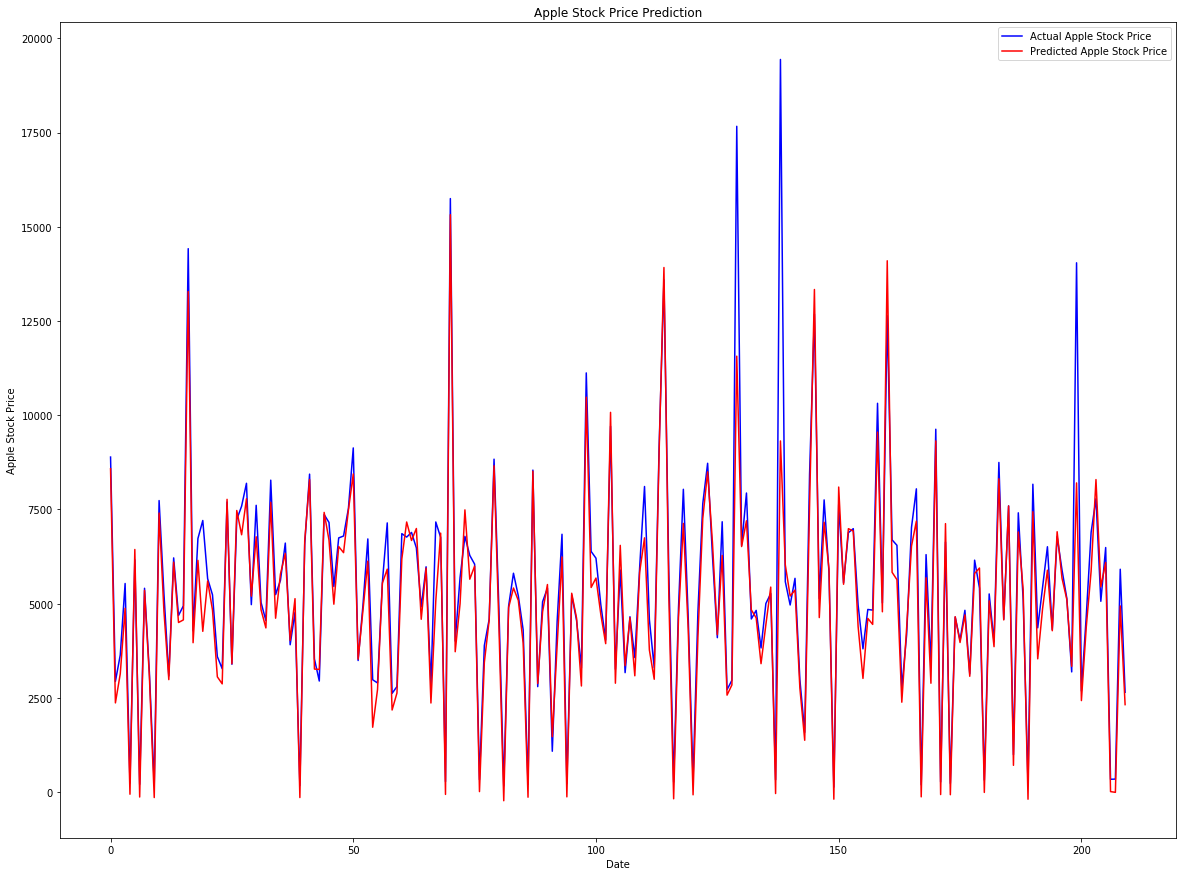

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot( scaler.inverse_transform(test_labels.reshape(-1, 1)), color='blue', label='Actual Apple Stock Price')
plt.plot(predictions, color='red', label='Global Uninstall')
plt.title('Global Uninstall')
plt.xlabel('Date')
plt.ylabel('Global Uninstall')
plt.legend()
plt.show()

# 5 days prediction

In [15]:
feature_set = []
labels = []

for i in range(60, len(df) - 4):
    feature_set.append(df_scaled[i-60:i, 0])
    labels.append(df_scaled[i + 4, 0])
    
from sklearn.model_selection import train_test_split    

feature_set, labels = np.array(feature_set), np.array(labels)
train, test = train_test_split(labels, test_size=0.3, random_state=20)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], 1))

train_feature_set, test_feature_set, train_labels, test_labels =  train_test_split(feature_set, labels, test_size=0.3, random_state=20)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model_2 = Sequential()

model_2.add(LSTM(units=60, return_sequences=True, input_shape=(train_feature_set.shape[1], 1)))
model_2.add(Dropout(0.25))

model_2.add(LSTM(units=60, return_sequences=True))
model_2.add(Dropout(0.25))

model_2.add(LSTM(units=60, return_sequences=True))
model_2.add(Dropout(0.25))

model_2.add(LSTM(units=60))
model_2.add(Dropout(0.25))

model_2.add(Dense(units=1))

model_2.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model_2.fit(train_feature_set, train_labels, epochs=600, batch_size=32)

Train on 487 samples
Epoch 1/600
487/487 [==============================] - 0s 519us/sample - loss: 0.0044
Epoch 2/600
487/487 [==============================] - 0s 495us/sample - loss: 0.0035
Epoch 3/600
487/487 [==============================] - 0s 479us/sample - loss: 0.0045s - loss: 0.0
Epoch 4/600
487/487 [==============================] - 0s 473us/sample - loss: 0.0031
Epoch 5/600
487/487 [==============================] - 0s 491us/sample - loss: 0.0023
Epoch 6/600
487/487 [==============================] - 0s 501us/sample - loss: 0.0027
Epoch 7/600
487/487 [==============================] - 0s 493us/sample - loss: 0.0046
Epoch 8/600
487/487 [==============================] - 0s 489us/sample - loss: 0.0037
Epoch 9/600
487/487 [==============================] - 0s 483us/sample - loss: 0.0057
Epoch 10/600
487/487 [==============================] - 0s 483us/sample - loss: 0.0050
Epoch 11/600
487/487 [==============================] - 0s 481us/sample - loss: 0.0047
Epoch 12/600
487/4

487/487 [==============================] - 0s 489us/sample - loss: 0.0012
Epoch 187/600
487/487 [==============================] - 0s 503us/sample - loss: 8.5947e-04
Epoch 188/600
487/487 [==============================] - 0s 503us/sample - loss: 9.4397e-04
Epoch 189/600
487/487 [==============================] - 0s 503us/sample - loss: 9.3626e-04
Epoch 190/600
487/487 [==============================] - 0s 499us/sample - loss: 8.4211e-04
Epoch 191/600
487/487 [==============================] - 0s 493us/sample - loss: 0.0011
Epoch 192/600
487/487 [==============================] - 0s 483us/sample - loss: 7.8636e-04
Epoch 193/600
487/487 [==============================] - 0s 495us/sample - loss: 7.2885e-04
Epoch 194/600
487/487 [==============================] - 0s 485us/sample - loss: 7.3440e-04
Epoch 195/600
487/487 [==============================] - 0s 481us/sample - loss: 9.8964e-04
Epoch 196/600
487/487 [==============================] - 0s 481us/sample - loss: 7.9806e-04
Epoch 197/

487/487 [==============================] - 0s 487us/sample - loss: 6.7082e-04
Epoch 365/600
487/487 [==============================] - 0s 507us/sample - loss: 5.7520e-04
Epoch 366/600
487/487 [==============================] - 0s 499us/sample - loss: 6.2080e-04
Epoch 367/600
487/487 [==============================] - 0s 489us/sample - loss: 5.6391e-04
Epoch 368/600
487/487 [==============================] - 0s 488us/sample - loss: 5.3635e-04
Epoch 369/600
487/487 [==============================] - 0s 485us/sample - loss: 8.2013e-04
Epoch 370/600
487/487 [==============================] - 0s 485us/sample - loss: 5.3015e-04
Epoch 371/600
487/487 [==============================] - 0s 611us/sample - loss: 6.2261e-04
Epoch 372/600
487/487 [==============================] - 0s 495us/sample - loss: 5.2843e-04
Epoch 373/600
487/487 [==============================] - 0s 499us/sample - loss: 5.1411e-04
Epoch 374/600
487/487 [==============================] - 0s 503us/sample - loss: 5.2020e-04
Ep

487/487 [==============================] - 0s 493us/sample - loss: 4.7045e-04
Epoch 543/600
487/487 [==============================] - 0s 480us/sample - loss: 6.3545e-04
Epoch 544/600
487/487 [==============================] - 0s 484us/sample - loss: 5.7396e-04
Epoch 545/600
487/487 [==============================] - 0s 499us/sample - loss: 5.5564e-04
Epoch 546/600
487/487 [==============================] - 0s 505us/sample - loss: 5.7626e-04
Epoch 547/600
487/487 [==============================] - 0s 499us/sample - loss: 5.0552e-04
Epoch 548/600
487/487 [==============================] - 0s 495us/sample - loss: 4.3040e-04
Epoch 549/600
487/487 [==============================] - 0s 491us/sample - loss: 4.6800e-04
Epoch 550/600
487/487 [==============================] - 0s 503us/sample - loss: 5.7367e-04
Epoch 551/600
487/487 [==============================] - 0s 505us/sample - loss: 5.3569e-04
Epoch 552/600
487/487 [==============================] - 0s 502us/sample - loss: 5.1585e-04
Ep

In [19]:
predictions = model_2.predict(test_feature_set)
predictions = scaler.inverse_transform(predictions)

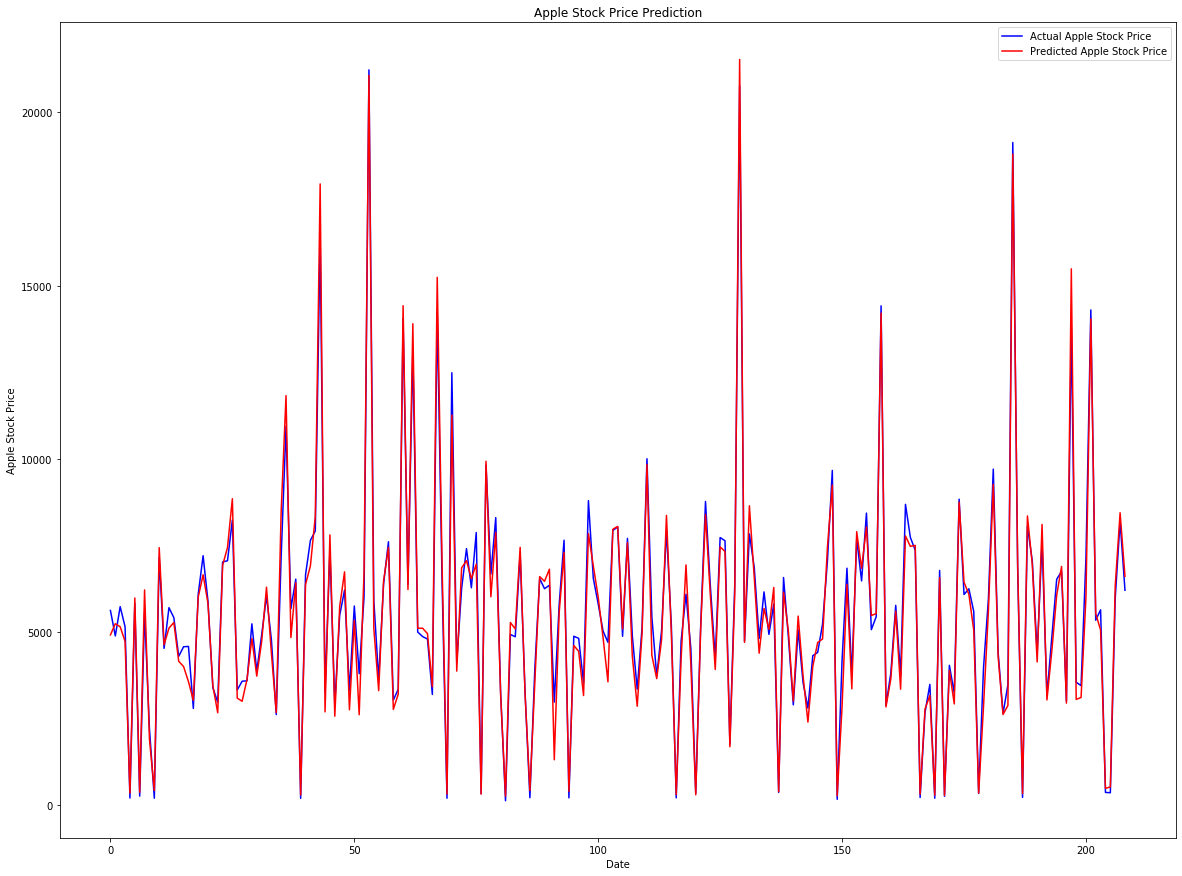

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot( scaler.inverse_transform(test_labels.reshape(-1, 1)), color='blue', label='Actual Apple Stock Price')
plt.plot(predictions, color='red', label='Global Uninstall')
plt.title('Global Uninstall')
plt.xlabel('Date')
plt.ylabel('Global Uninstall')
plt.legend()
plt.show()

In [21]:
model_2.save('gl_lstm_5days.h5')

# 7 days prediction

In [23]:
feature_set = []
labels = []

for i in range(60, len(df) - 6):
    feature_set.append(df_scaled[i-60:i, 0])
    labels.append(df_scaled[i + 6, 0])
    
from sklearn.model_selection import train_test_split    

feature_set, labels = np.array(feature_set), np.array(labels)
train, test = train_test_split(labels, test_size=0.3, random_state=20)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], 1))

train_feature_set, test_feature_set, train_labels, test_labels =  train_test_split(feature_set, labels, test_size=0.3, random_state=20)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model_3 = Sequential()

model_3.add(LSTM(units=60, return_sequences=True, input_shape=(train_feature_set.shape[1], 1)))
model_3.add(Dropout(0.25))

model_3.add(LSTM(units=60, return_sequences=True))
model_3.add(Dropout(0.25))

model_3.add(LSTM(units=60, return_sequences=True))
model_3.add(Dropout(0.25))

model_3.add(LSTM(units=60))
model_3.add(Dropout(0.25))

model_3.add(Dense(units=1))

model_3.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model_3.fit(train_feature_set, train_labels, epochs=800, batch_size=32)

Train on 485 samples
Epoch 1/800
485/485 [==============================] - 5s 11ms/sample - loss: 0.0338
Epoch 2/800
485/485 [==============================] - 0s 513us/sample - loss: 0.0202
Epoch 3/800
485/485 [==============================] - 0s 509us/sample - loss: 0.0186
Epoch 4/800
485/485 [==============================] - 0s 491us/sample - loss: 0.0192
Epoch 5/800
485/485 [==============================] - 0s 482us/sample - loss: 0.0182
Epoch 6/800
485/485 [==============================] - 0s 478us/sample - loss: 0.0183
Epoch 7/800
485/485 [==============================] - 0s 475us/sample - loss: 0.0185
Epoch 8/800
485/485 [==============================] - 0s 489us/sample - loss: 0.0181
Epoch 9/800
485/485 [==============================] - 0s 495us/sample - loss: 0.0180
Epoch 10/800
485/485 [==============================] - 0s 485us/sample - loss: 0.0176
Epoch 11/800
485/485 [==============================] - 0s 481us/sample - loss: 0.0183
Epoch 12/800
485/485 [==========

485/485 [==============================] - 0s 495us/sample - loss: 0.0106
Epoch 188/800
485/485 [==============================] - 0s 475us/sample - loss: 0.0123
Epoch 189/800
485/485 [==============================] - 0s 487us/sample - loss: 0.0125
Epoch 190/800
485/485 [==============================] - 0s 491us/sample - loss: 0.0112
Epoch 191/800
485/485 [==============================] - 0s 485us/sample - loss: 0.0108
Epoch 192/800
485/485 [==============================] - 0s 497us/sample - loss: 0.0097
Epoch 193/800
485/485 [==============================] - 0s 484us/sample - loss: 0.0097
Epoch 194/800
485/485 [==============================] - 0s 500us/sample - loss: 0.0102
Epoch 195/800
485/485 [==============================] - 0s 484us/sample - loss: 0.0093
Epoch 196/800
485/485 [==============================] - 0s 493us/sample - loss: 0.0096
Epoch 197/800
485/485 [==============================] - 0s 483us/sample - loss: 0.0101
Epoch 198/800
485/485 [=======================

485/485 [==============================] - 0s 503us/sample - loss: 0.0110
Epoch 372/800
485/485 [==============================] - 0s 503us/sample - loss: 0.0217
Epoch 373/800
485/485 [==============================] - 0s 582us/sample - loss: 0.0169
Epoch 374/800
485/485 [==============================] - 0s 521us/sample - loss: 0.0154
Epoch 375/800
485/485 [==============================] - 0s 501us/sample - loss: 0.0150
Epoch 376/800
485/485 [==============================] - 0s 507us/sample - loss: 0.0141s - loss: 0.01
Epoch 377/800
485/485 [==============================] - 0s 505us/sample - loss: 0.0143
Epoch 378/800
485/485 [==============================] - 0s 507us/sample - loss: 0.0137
Epoch 379/800
485/485 [==============================] - 0s 515us/sample - loss: 0.0129
Epoch 380/800
485/485 [==============================] - 0s 499us/sample - loss: 0.0135
Epoch 381/800
485/485 [==============================] - 0s 485us/sample - loss: 0.0132
Epoch 382/800
485/485 [=========

485/485 [==============================] - 0s 504us/sample - loss: 0.0024
Epoch 556/800
485/485 [==============================] - 0s 515us/sample - loss: 0.0027
Epoch 557/800
485/485 [==============================] - 0s 495us/sample - loss: 0.0042
Epoch 558/800
485/485 [==============================] - 0s 483us/sample - loss: 0.0034
Epoch 559/800
485/485 [==============================] - 0s 479us/sample - loss: 0.0021
Epoch 560/800
485/485 [==============================] - 0s 481us/sample - loss: 0.0020
Epoch 561/800
485/485 [==============================] - 0s 489us/sample - loss: 0.0019
Epoch 562/800
485/485 [==============================] - 0s 505us/sample - loss: 0.0018s - loss: 0.002
Epoch 563/800
485/485 [==============================] - 0s 489us/sample - loss: 0.0018
Epoch 564/800
485/485 [==============================] - 0s 537us/sample - loss: 0.0018
Epoch 565/800
485/485 [==============================] - 0s 575us/sample - loss: 0.0019
Epoch 566/800
485/485 [========

485/485 [==============================] - 0s 509us/sample - loss: 0.0018
Epoch 740/800
485/485 [==============================] - 0s 493us/sample - loss: 0.0017
Epoch 741/800
485/485 [==============================] - 0s 491us/sample - loss: 0.0025
Epoch 742/800
485/485 [==============================] - 0s 483us/sample - loss: 0.0018
Epoch 743/800
485/485 [==============================] - 0s 483us/sample - loss: 0.0019
Epoch 744/800
485/485 [==============================] - 0s 495us/sample - loss: 0.0011
Epoch 745/800
485/485 [==============================] - 0s 505us/sample - loss: 0.0012
Epoch 746/800
485/485 [==============================] - 0s 491us/sample - loss: 0.0016
Epoch 747/800
485/485 [==============================] - 0s 489us/sample - loss: 0.0011
Epoch 748/800
485/485 [==============================] - 0s 483us/sample - loss: 0.0010
Epoch 749/800
485/485 [==============================] - 0s 489us/sample - loss: 0.0010
Epoch 750/800
485/485 [=======================

In [26]:
model_3.save('gl_lstm_7days.h5')